<a href="https://colab.research.google.com/github/jmhjasso/ML-Bootcamp-practice/blob/main/NJ_FoodBank_pov_pred_26Dec23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##To predict poverty accross the US
##we will try to predict the poverty_rate based on other features

In [ ]:
#1
#Getting the datasets
import pandas as pd

#obtaining poverty labels dataset
data_url_labels = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS3C-be5gO6OKi1yuqX2DBj4LADrpKaAgXjskRCQcWFn6CfPe_UkzTqzC0-C81SqbbpFOhJOytbRHjJ/pub?gid=1105185521&single=true&output=csv'
dflabel = pd.read_csv(data_url_labels)

#obtaining the rest of poverty dataset
data_url_poverty = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQhs5gtzct5-mf4RMdB0cwO9xT1Z7s86Bt2jKb335ErwhTtpsr8nBHzwulmaQkeI5Z4v8wSFBFh680W/pub?gid=182245932&single=true&output=csv'
dfpoverty = pd.read_csv(data_url_poverty)



In [ ]:
#2
dfpoverty.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,...,0.159,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b
1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,...,0.123,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b
2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,...,0.092,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,...,0.084,0.100,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b
4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,...,0.080,0.086,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a


In [ ]:
#3
dflabel.head()

,row_id,poverty_rate
0,0,22.6
1,2,17.3
2,4,24.4
3,5,16.4
4,8,17.4


In [ ]:
#4
dfpoverty.shape

(3198, 34)

In [ ]:
#5
dflabel.shape

(3198, 2)

In [ ]:
#6
# Merging both datasets matching row_id column.
dfm = pd.merge(dflabel, dfpoverty, on='row_id')

# view the merged dataset
dfm.head()

,row_id,poverty_rate,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,22.6,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,...,0.159,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b
1,2,17.3,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,...,0.123,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b
2,4,24.4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,...,0.092,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b
3,5,16.4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,...,0.084,0.100,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b
4,8,17.4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,...,0.080,0.086,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a


In case you want to activate the visibility of all columns and all rows:

#Visualizing the full dataset sort by poverty rate
# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)
dfm.sort_values(by='row_id', inplace=True)
dfm

In [ ]:
#7
# Get the columns name and type
columns_name_type = dfm.dtypes
print(columns_name_type)

row_id                                                int64
poverty_rate                                        float64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                         

In [ ]:
#8
#saving the dataset
# Save the DataFrame to a CSV file
dfm.to_csv('NJPoverty.csv', index=False)

###EDA STARTS###

In [ ]:
# 9
#Installing dataprep package for data profiling
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252697 sha256=0d2b83f4d1

In [ ]:
#10
# Importing dataprep package for data profiling
from dataprep.eda import create_report

In [ ]:
#11
# Generating the data profiling report
create_report(dfm).save()

Computing size-agg-73f3f4daeca4d9f2181e914445cebbbf:   4%|▎         | 275/7666 [00:00<00:15, 463.41it/s]                                                 /usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
ERROR:bokeh.core.validation.check:E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'demo__pct_adu...oma'


Report has been saved to /content/report.html!


poverty_rate:

Mean: 16.81
The mean poverty rate of 16.81 indicates the average poverty rate across the dataset.

Standard Deviation: 6.698
The standard deviation of 6.698 measures the amount of variation or dispersion of the poverty rates from the mean. A higher standard deviation indicates that the poverty rates are more spread out from the mean.

Variance: 44.8628
The variance of 44.8628 is the square of the standard deviation and represents the average of the squared differences from the mean. It provides another measure of the spread of the poverty rates.

Skewness: 1.0479
The skewness of 1.0479 indicates the asymmetry of the distribution of poverty rates. A positive skewness suggests that the distribution is skewed to the right, meaning there are more data points on the left side of the distribution with a long tail to the right.

Kurtosis: 1.662
The kurtosis of 1.662 measures the tailedness of the distribution of poverty rates. A kurtosis greater than 3 indicates heavy tails and a sharper peak than the normal distribution.
Coefficient of Variation: 0.3983

The coefficient of variation (CV) of 0.3983 is a measure of relative variability and represents the standard deviation as a percentage of the mean. It provides a standardized measure of dispersion, allowing comparison of variability across different datasets.

In [ ]:
#12
# Installing sweetviz package for visualization and statistical analysis
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.1 MB/s eta 0:00:00


In [ ]:
#13
# Get the list of column names in the dataframe
column_names = list(dfm.columns)

# Print the list of column names
print(column_names)

['row_id', 'poverty_rate', 'area__rucc', 'area__urban_influence', 'econ__economic_typology', 'econ__pct_civilian_labor', 'econ__pct_unemployment', 'econ__pct_uninsured_adults', 'econ__pct_uninsured_children', 'demo__pct_female', 'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american', 'demo__pct_non_hispanic_white', 'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian', 'demo__pct_adults_less_than_a_high_school_diploma', 'demo__pct_adults_with_high_school_diploma', 'demo__pct_adults_with_some_college', 'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k', 'demo__death_rate_per_1k', 'health__pct_adult_obesity', 'health__pct_adult_smoking', 'health__pct_diabetes', 'health__pct_low_birthweight', 'health__pct_excessive_drinking', 'health__pct_physical_inacticity', 'health__air_pollution_particulate_matter', 'health__homicides_per_100k', 'health__motor_vehicle_crash_deaths_per_100k', 'hea

In [ ]:
#14
# Generating a dataset with only independent variables
pred_cols = ['row_id', 'poverty_rate', 'area__rucc', 'area__urban_influence',
             'econ__economic_typology', 'econ__pct_civilian_labor', 'econ__pct_unemployment',
             'econ__pct_uninsured_adults', 'econ__pct_uninsured_children', 'demo__pct_female',
             'demo__pct_below_18_years_of_age',
             'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic',
             'demo__pct_non_hispanic_african_american', 'demo__pct_non_hispanic_white',
             'demo__pct_american_indian_or_alaskan_native',
             'demo__pct_asian', 'demo__pct_adults_less_than_a_high_school_diploma',
             'demo__pct_adults_with_high_school_diploma', 'demo__pct_adults_with_some_college',
             'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k', 'demo__death_rate_per_1k',
             'health__pct_adult_obesity', 'health__pct_adult_smoking', 'health__pct_diabetes', 'health__pct_low_birthweight',
             'health__pct_excessive_drinking', 'health__pct_physical_inacticity', 'health__air_pollution_particulate_matter',
             'health__homicides_per_100k', 'health__motor_vehicle_crash_deaths_per_100k',
             'health__pop_per_dentist', 'health__pop_per_primary_care_physician', 'yr']
pred_data = dfm[pred_cols]

In [ ]:
#15
#getting the missing values
missing_values = dfm.isnull().sum()
print(missing_values)

row_id                                                 0
poverty_rate                                           0
area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_hi

In [ ]:
#`15.1
# Importing the package
import sweetviz as sv


In [ ]:
#16
# Generating EDA report using sweetviz
sv_report = sv.analyze(pred_data)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#17
# Generate a html formatted report
sv_report.show_html("SweetVizNJFoodBank EDA23Dec23.html")

Report SweetVizNJFoodBank EDA23Dec23.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###Predictions Section###

In [ ]:
#18
#Classification of features
ignored_cols=['health__pct_excessive_drinking', 'health__homicides_per_100k', 'health__air_pollution_particulate_matter', 'yr', 'row_id']

cat_cols=['area__rucc', 'area__urban_influence', 'econ__economic_typology']

num_cols = ['econ__pct_civilian_labor' , 'econ__pct_unemployment', 'econ__pct_uninsured_adults', 'econ__pct_uninsured_children', 'demo__pct_female',
            'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older',  'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american',
            'demo__pct_non_hispanic_white', 'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian', 'demo__pct_adults_less_than_a_high_school_diploma',
            'demo__pct_adults_with_high_school_diploma', 'demo__pct_adults_with_some_college', 'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
            'demo__death_rate_per_1k', 'health__pct_adult_obesity', 'health__pct_adult_smoking', 'health__pct_diabetes', 'health__pct_low_birthweight',
            'health__pct_physical_inacticity',
            'health__motor_vehicle_crash_deaths_per_100k', 'health__pop_per_dentist', 'health__pop_per_primary_care_physician']

# Setting the dependent/target/label variable
y='poverty_rate'

In [ ]:
#19
# Installing Pycaret for Automated ML
!pip install  -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.9 M

In [ ]:
#20
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
#21
# Setting/configuring the ML experiment
from pycaret.regression import *

s=setup(dfm,
target = y, session_id=123, pca=True, normalize=True,

categorical_features = cat_cols,
numeric_features = num_cols,
ignore_features = ignored_cols)

,Description,Value
0,Session id,123
1,Target,poverty_rate
2,Target type,Regression
3,Original data shape,"(3198, 35)"
4,Transformed data shape,"(3198, 54)"
5,Transformed train set shape,"(2238, 54)"
6,Transformed test set shape,"(960, 54)"
7,Ignore features,5
8,Numeric features,26
9,Categorical features,3


In [ ]:
#22
# Invoking ML agorithms
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0470,7.3315,2.7006,0.8328,0.1560,0.1350,1.2410
lightgbm,Light Gradient Boosting Machine,2.1043,7.7411,2.7720,0.8238,0.1582,0.1368,2.1980
xgboost,Extreme Gradient Boosting,2.2040,8.4669,2.9027,0.8063,0.1657,0.1433,1.1520
rf,Random Forest Regressor,2.2310,8.7734,2.9534,0.8002,0.1679,0.1467,3.4650
gbr,Gradient Boosting Regressor,2.3162,9.2540,3.0346,0.7892,0.1760,0.1540,1.7940
br,Bayesian Ridge,2.3937,10.2983,3.2013,0.7662,0.1874,0.1575,0.0870
ridge,Ridge Regression,2.4000,10.3006,3.2020,0.7660,0.1882,0.1578,0.0840
lar,Least Angle Regression,2.4011,10.3036,3.2025,0.7660,0.1883,0.1579,0.1200
lr,Linear Regression,2.4036,10.3163,3.2044,0.7657,0.1885,0.1580,0.4260
huber,Huber Regressor,2.3709,10.4930,3.2288,0.7628,0.1827,0.1525,0.1050


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
#23
best

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [ ]:
#24
type(best)

sklearn.ensemble._forest.ExtraTreesRegressor

In [ ]:
#25

data_predictions= pd.read_csv( 'NJPoverty.csv')

data_predictions.head()

,row_id,poverty_rate,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,22.6,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,...,0.159,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b
1,2,17.3,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,...,0.123,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b
2,4,24.4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,...,0.092,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b
3,5,16.4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,...,0.084,0.100,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b
4,8,17.4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,...,0.080,0.086,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a


In [ ]:
#26
# Creating the model
#If the values of the mean of the results of this instruction match with the results from pycaret, then the model is a good fit
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9042,6.1212,2.4741,0.8522,0.1568,0.1372
1,2.1433,9.9421,3.1531,0.8081,0.1483,0.1223
2,2.1348,8.1662,2.8576,0.8190,0.1621,0.1419
3,2.1927,7.8169,2.7959,0.8550,0.1602,0.1454
4,2.0556,7.3468,2.7105,0.8098,0.1714,0.1430
5,1.9733,6.0657,2.4629,0.8002,0.1422,0.1273
6,2.0738,7.5642,2.7503,0.8453,0.1523,0.1345
7,1.9765,6.4297,2.5357,0.8740,0.1514,0.1305
8,2.0763,6.9797,2.6419,0.8206,0.1582,0.1370


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#26
# Predicting DonorIndicatorFlag using the best model
predicted_data = predict_model(model, data_predictions)
predicted_data.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6162,2.2969,1.5155,0.9488,0.0919,0.0427


,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate,prediction_label
0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,...,NaN,0.317,12.0,9.33,33.750000,5429.0,6949.0,b,22.600000,22.600000
1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,...,0.177,0.350,14.0,2.10,23.809999,3060.0,1749.0,b,17.299999,17.299999
2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,...,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b,24.400000,24.400000
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,...,0.174,0.249,11.0,NaN,23.110001,1430.0,1160.0,b,16.400000,16.400000
4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,...,0.178,0.253,11.0,3.40,3.680000,1700.0,1870.0,a,17.400000,17.129000


In [ ]:
#27
# Converting client data pandas dataframe to a csv file
predicted_data.to_csv("NJPovertyMOdel26Dec23.csv")

In [ ]:
save_model(model, 'NJPovertyPredModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['econ__pct_civilian_labor',
                                              'econ__pct_unemployment',
                                              'econ__pct_uninsured_adults',
                                              'econ__pct_uninsured_children',
                                              'demo__pct_female',
                                              'demo__pct_below_18_years_of_age',
                                              'demo__pct_aged_65_years_and_older',
                                              'demo__pct_hispanic',
                                              'demo__pct_non_hispanic_african_am...
                                              'econ__economic_typology'],
                                     transformer=OneHotEncoder(cols=['area__rucc',
                                                                     'area__urban_

In [ ]:
#28
l=load_model('NJPovertyPredModel')
l

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['econ__pct_civilian_labor',
                                             'econ__pct_unemployment',
                                             'econ__pct_uninsured_adults',
                                             'econ__pct_uninsured_children',
                                             'demo__pct_female',
                                             'demo__pct_below_18_years_of_age',
                                             'demo__pct_aged_65_years_and_older',
                                             'demo__pct_hispanic',
                                             'demo__pct_non_hispanic...
                                             'econ__economic_typology'],
                                    transformer=OneHotEncoder(cols=['area__rucc',
                                                                    'area__urban_influence',
                                                                    'econ__economic_typology'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('pca', TransformerWrapper(exclude=[], transformer=PCA())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [ ]:
#29
#Quantifying the prediction model
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
df = pd.read_csv('NJPovertyMOdel26Dec23.csv')
# Calculate mean squared error
mse = mean_squared_error(df['poverty_rate'], df['prediction_label'])
# Calculate R-squared
r_squared = r2_score(df['poverty_rate'], df['prediction_label'])
print('Mean Squared Error (MSE):', mse)
print('R-squared:', r_squared)

Mean Squared Error (MSE): 2.2968501441938503
R-squared: 0.9487867588612162


In [ ]:
  #29
  #comparing actual vs predicted
  dfpred = pd.read_csv('NJPovertyMOdel26Dec23.csv')
  dfpred.head()

,Unnamed: 0,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,...,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate,prediction_label
0,0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,...,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b,22.6,22.600000
1,1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,...,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b,17.3,17.299999
2,2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,...,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b,24.4,24.400000
3,3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,...,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b,16.4,16.400000
4,4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,...,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a,17.4,17.129000


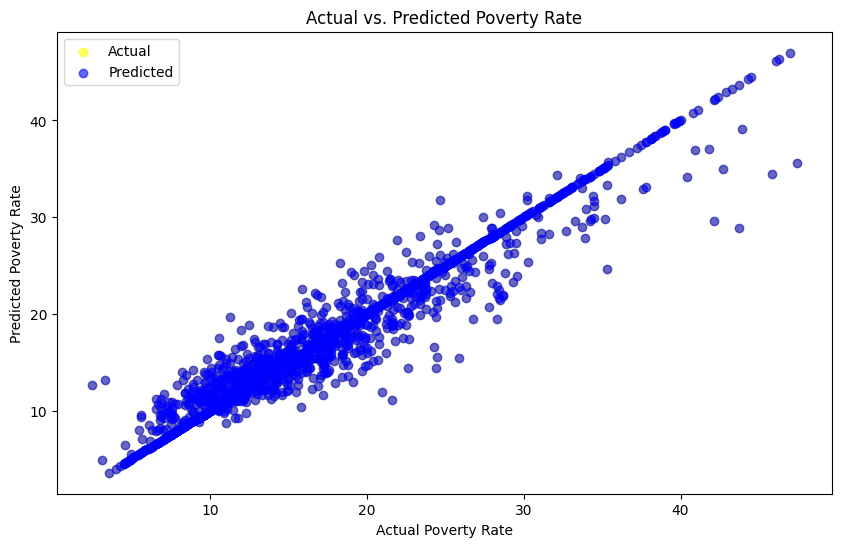

In [ ]:
#30
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(dfpred['poverty_rate'], dfpred['prediction_label'], color='yellow', label='Actual', alpha=0.6)
plt.scatter(dfpred['poverty_rate'], dfpred['prediction_label'], color='blue', label='Predicted', alpha=0.6)
plt.title('Actual vs. Predicted Poverty Rate')
plt.xlabel('Actual Poverty Rate')
plt.ylabel('Predicted Poverty Rate')
plt.legend()
plt.show()
